Installing (updating) the following libraries for your Sagemaker
instance.

In [ ]:
!pip install .. # installing d2l


# Concise Implementation of Multilayer Perceptrons
:label:`sec_mlp_concise`

As you might expect, by (**relying on the high-level APIs,
we can implement MLPs even more concisely.**)


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## Model

As compared with our concise implementation
of softmax regression implementation
(:numref:`sec_softmax_concise`),
the only difference is that we add
*two* fully-connected layers
(previously, we added *one*).
The first is [**our hidden layer**],
which (**contains 256 hidden units
and applies the ReLU activation function**).
The second is our output layer.


In [2]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

[**The training loop**] is exactly the same
as when we implemented softmax regression.
This modularity enables us to separate
matters concerning the model architecture
from orthogonal considerations.


In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

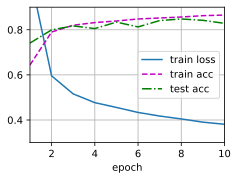

In [4]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Summary

* Using high-level APIs, we can implement MLPs much more concisely.
* For the same classification problem, the implementation of an MLP is the same as that of softmax regression except for additional hidden layers with activation functions.

## Exercises

1. Try adding different numbers of hidden layers (you may also modify the learning rate). What setting works best?
1. Try out different activation functions. Which one works best?
1. Try different schemes for initializing the weights. What method works best?


[Discussions](https://discuss.d2l.ai/t/95)
